In [1]:
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
## Load the data into a DataFrame
stores=pd.read_csv('/Users/austinlasseter/DSI-EC-2/projects/datasets/stores_postEDA.csv')
stores=stores.drop(['Unnamed: 0'], axis=1)

In [6]:
stores.columns

Index(['store_id', 'fips', 'metro', 'unemployment', 'income', 'population',
       'ave_bottle_price', 'ave_number_bottles', 'annual_profit_per_store',
       'unemp_bins', 'income_bins', 'pop_bins'],
      dtype='object')

In [10]:
# This is model #5 from the previous notebook (I'm using SK Learn this time, not stats models)
dep = stores['annual_profit_per_store'] # This is the outcome I want to predict
indep = stores.drop(['store_id', 'fips','unemp_bins', 'income_bins', 
                     'pop_bins', 'annual_profit_per_store', 'unemployment', 'population'], 
                    axis = 'columns') # These are the features that predict it
lm = linear_model.LinearRegression(fit_intercept=True,
                                   normalize=False,
                                   copy_X=True,
                                   n_jobs=1)
lm.fit(X=indep, y=dep)
predicted = lm.predict(X=indep) # y_preds
true = dep

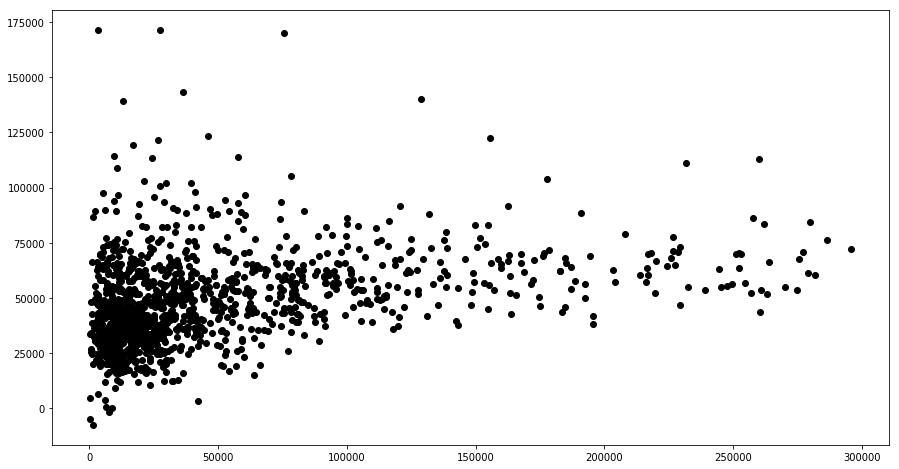

In [17]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=dep, y=predicted, c='k')
#ax.plot(stores['X'], stores['Linear_Yhat'], color='k');

# iterate over predictions
#for _, row in stores.iterrows():
 #   plt.plot((row['X'], row['X']), (row['Y'], row['Linear_Yhat']), 'r-')

ValueError: bins must increase monotonically.

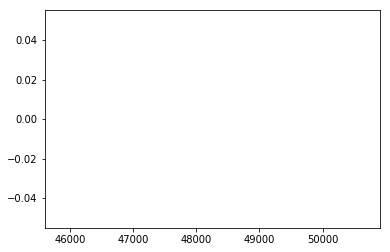

In [9]:
sns.distplot(predicted, true)